In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("healthcare_patient_data_cleaned.csv")
df.head()

,patient_id,age,gender,department,admit_date,length_of_stay,prior_admissions_6mo,comorbidity_count,blood_glucose,blood_pressure,med_count,readmitted_30d,admit_month,admit_day,admit_day_name
0,1001,71,Male,General Medicine,2023-01-01,10,3,3,153,158,5,0,1,1,Sunday
1,1002,34,Female,Oncology,2023-01-02,9,0,0,78,179,4,0,1,2,Monday
2,1003,80,Male,Orthopedics,2023-01-03,5,1,1,235,151,10,1,1,3,Tuesday
3,1004,40,Female,Oncology,2023-01-04,6,2,5,245,155,1,1,1,4,Wednesday
4,1005,43,Male,Orthopedics,2023-01-05,4,1,0,132,153,10,0,1,5,Thursday


In [6]:
df.shape

(300, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   patient_id            300 non-null    int64 
 1   age                   300 non-null    int64 
 2   gender                300 non-null    object
 3   department            300 non-null    object
 4   admit_date            300 non-null    object
 5   length_of_stay        300 non-null    int64 
 6   prior_admissions_6mo  300 non-null    int64 
 7   comorbidity_count     300 non-null    int64 
 8   blood_glucose         300 non-null    int64 
 9   blood_pressure        300 non-null    int64 
 10  med_count             300 non-null    int64 
 11  readmitted_30d        300 non-null    int64 
 12  admit_month           300 non-null    int64 
 13  admit_day             300 non-null    int64 
 14  admit_day_name        300 non-null    object
dtypes: int64(11), object(4)
memory usage: 35

In [8]:
df.describe()

,patient_id,age,length_of_stay,prior_admissions_6mo,comorbidity_count,blood_glucose,blood_pressure,med_count,readmitted_30d,admit_month,admit_day
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,1150.500000,53.870000,7.433333,1.913333,2.500000,158.780000,134.143333,5.706667,0.330000,5.466667,15.530000
std,86.746758,20.496996,3.923886,1.411547,1.681097,52.912039,26.332123,3.036119,0.470998,2.847675,8.719856
min,1001.000000,20.000000,1.000000,0.000000,0.000000,70.000000,90.000000,1.000000,0.000000,1.000000,1.000000
25%,1075.750000,37.000000,4.000000,1.000000,1.000000,113.000000,111.000000,3.000000,0.000000,3.000000,8.000000
50%,1150.500000,53.500000,7.000000,2.000000,2.000000,160.000000,133.000000,5.000000,0.000000,5.000000,15.500000
75%,1225.250000,72.000000,11.000000,3.000000,4.000000,202.250000,159.000000,8.000000,1.000000,8.000000,23.000000
max,1300.000000,89.000000,14.000000,4.000000,5.000000,248.000000,179.000000,11.000000,1.000000,10.000000,31.000000


In [9]:
df.describe(include='object')

,gender,department,admit_date,admit_day_name
count,300,300,300,300
unique,2,5,300,7
top,Female,Oncology,2023-01-01,Sunday
freq,153,67,1,43


# Readmission Rate

In [11]:
df['readmitted_30d'].value_counts(normalize=True)*100
df['readmitted_30d'].value_counts()


readmitted_30d
0    201
1     99
Name: count, dtype: int64

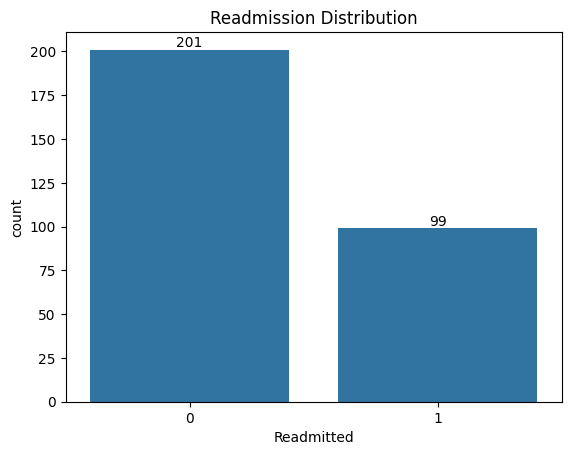

In [39]:
ax = sns.countplot(data=df, x='readmitted_30d')
plt.title("Readmission Distribution")
plt.xlabel("Readmitted")
ax.bar_label(ax.containers[0])
plt.show()

# Age Distribution

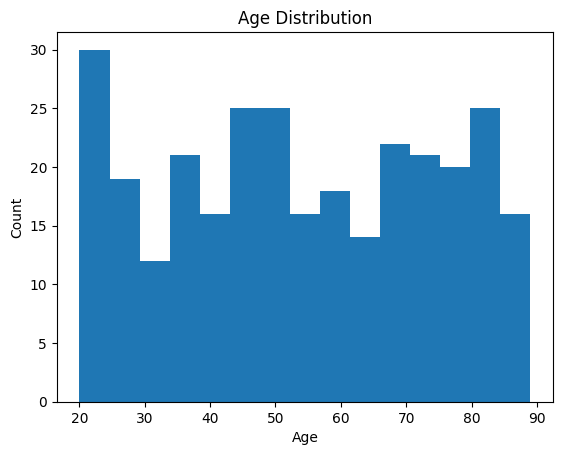

In [8]:
plt.hist(df['age'], bins=15)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Length of Stay

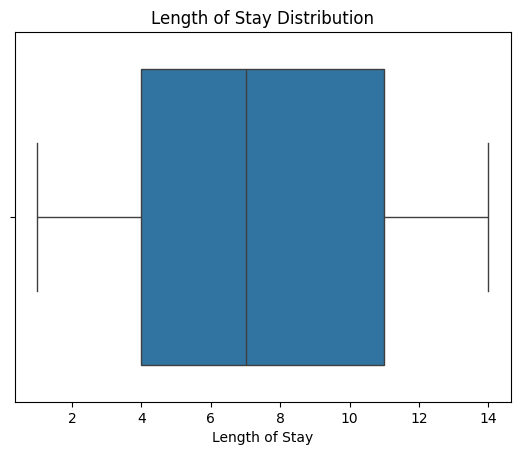

In [38]:
sns.boxplot(x=df["length_of_stay"])
plt.title("Length of Stay Distribution")
plt.xlabel("Length of Stay")
plt.show()

# Readmission vs Age

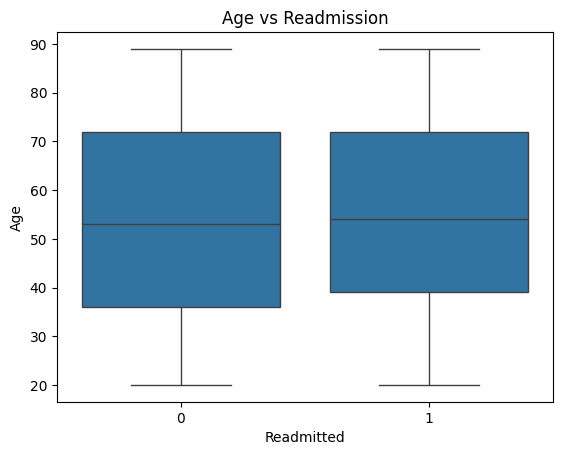

In [40]:
ax=sns.boxplot(data=df, x="readmitted_30d", y="age")
plt.title("Age vs Readmission")
plt.xlabel("Readmitted")
plt.ylabel("Age")
plt.show()

# Readmission vs Department

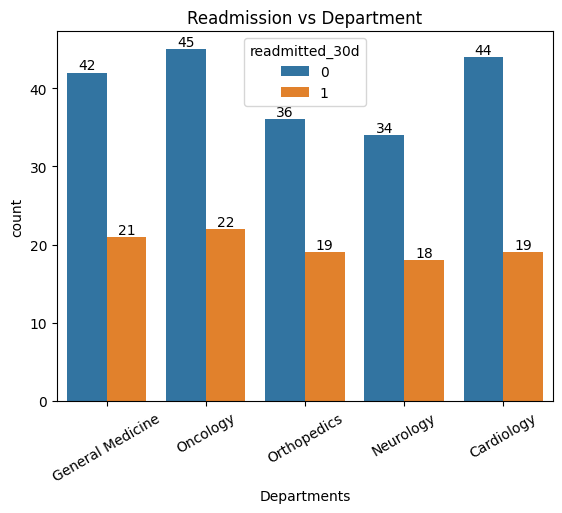

In [31]:
ax = sns.countplot(data=df, x="department", hue="readmitted_30d")

# Apply labels to each container
for container in ax.containers:
    ax.bar_label(container)
    
plt.title("Readmission vs Department")
plt.xticks(rotation=30)
plt.xlabel("Departments")
plt.show()

# Correlation Heatmap

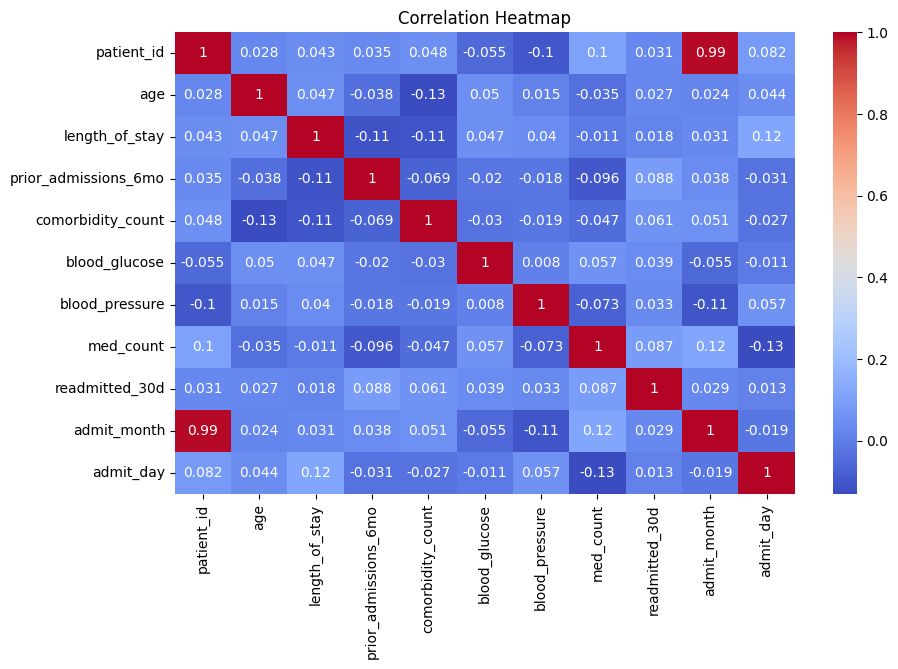

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Blood Glucose – Readmission Relationship

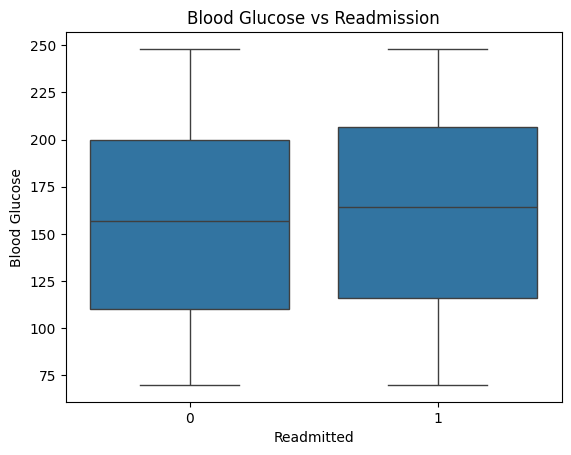

In [41]:
sns.boxplot(data=df,x="readmitted_30d", y="blood_glucose")
plt.title("Blood Glucose vs Readmission")
plt.xlabel("Readmitted")
plt.ylabel("Blood Glucose")
plt.show()

# Prior Admissions Effect

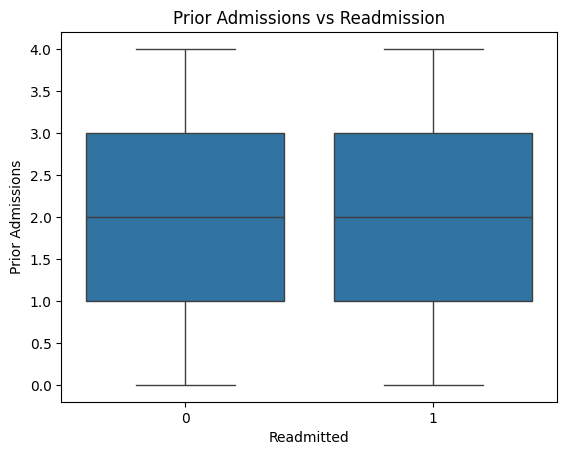

In [43]:
sns.boxplot(data=df, x="readmitted_30d", y="prior_admissions_6mo")
plt.title("Prior Admissions vs Readmission")
plt.xlabel("Readmitted")
plt.ylabel("Prior Admissions")
plt.show()